<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S3_1_1_Californian_Housing_Market_SOLUTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Californian Housing Market




Dans Sklearn, il y a des datasets qui sont déjà pré-enregistré qu'on peut utiliser à nos fins pour appliquer des algorithmes de Machine Learning. Tentons de regarder le premier avec _Boston Housing Market_

1. Importez les librairies usuelles

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

    2. Utilisez les lignes de codes suivantes afin de récupérer les données sur les prix de l’immobilier en Californie :
    
```
from sklearn import datasets
data = datasets.california_housing.fetch_california_housing()
```

In [0]:
from sklearn import datasets
data = datasets.california_housing.fetch_california_housing() 

In [0]:
data

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geograp

3. Utilisez UNE ligne de code pour obtenir les noms des différentes variables explicatives

In [0]:
data["feature_names"]

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

4. On préfèrerait avoir ces données dans un DataFrame. Utilisez la librairies Pandas pour trouver un moyen de mettre ces données dans un DataFrame 

Vous pouvez aller plus particulièrement regarder le lien suivant : 

[DataFrame en Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

In [0]:
dataset = pd.DataFrame(columns=data["feature_names"], data=data.data)
dataset = pd.concat([dataset,pd.DataFrame({"Price":data.target})], axis=1)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [0]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

5. Visualisez l'impact de chacune des variables sur le prix avec Seaborn 

a. Faites un nuage de points pour exprimer _MedInc_ en fonction de _Price_

In [0]:
sns.relplot(x=dataset.columns[0], y=dataset.columns[-1], data= dataset, kind="line")

NameError: ignored

b. Regardez maintenant l'influence de l'âge de la maison par rapport au prix

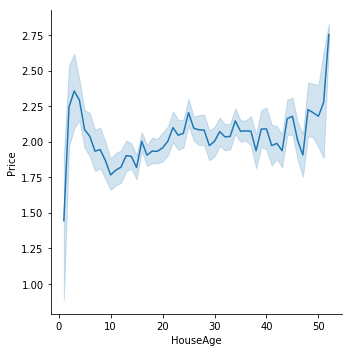

In [0]:
sns.relplot(x=dataset.columns[1], y=dataset.columns[-1], data= dataset, kind="line")

c. Trouvez un moyen de regarder la tendance entre _AveRooms_ & _Price_

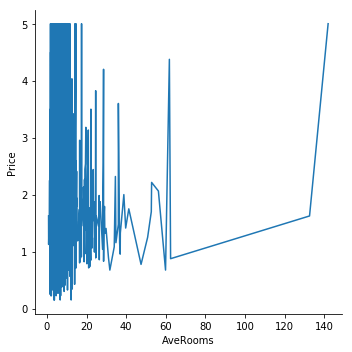

In [0]:
sns.relplot(x=dataset.columns[2], y=dataset.columns[-1], data= dataset, kind="line")

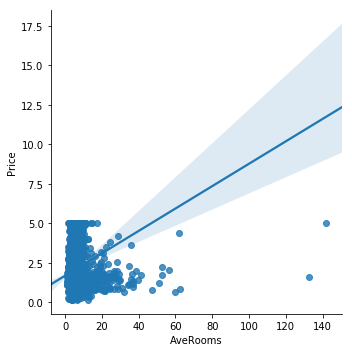

In [0]:
sns.lmplot(x=dataset.columns[2], y=dataset.columns[-1], data= dataset)

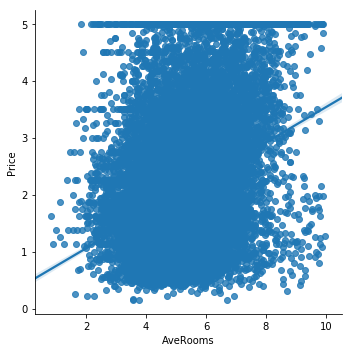

In [0]:
sns.lmplot(x=dataset.columns[2], y=dataset.columns[-1], data= dataset.loc[dataset["AveRooms"]<10])

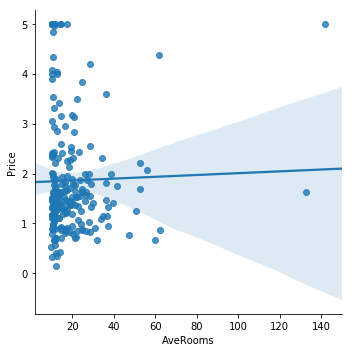

In [0]:
sns.lmplot(x=dataset.columns[2], y=dataset.columns[-1], data= dataset.loc[dataset["AveRooms"]>=10])

d. Faites de même avec _AveBedrms_ & _Price_

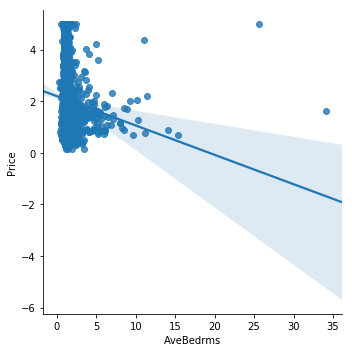

In [0]:
sns.lmplot(x=dataset.columns[3], y=dataset.columns[-1], data= dataset)

e. Faites de même avec la population. Simplement, filtrez le dataset pour qu'il ne contienne uniquement les valeurs pour lesquelles la population est inférieur à 15000

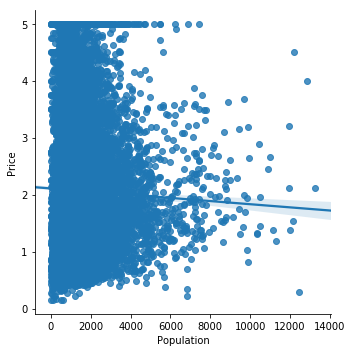

In [0]:
sns.lmplot(x=dataset.columns[4], y=dataset.columns[-1], data= dataset.query("Population<15000"))

f. Faites de même avec _AveOccup_. Cette fois filtrez la colonne pour ne garder unqiuement les valeurs inférieures à 100

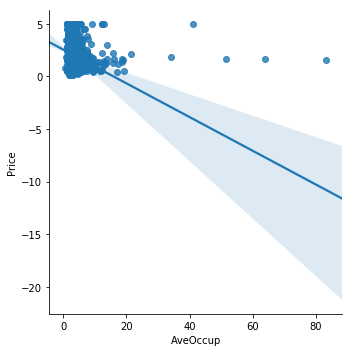

In [0]:
sns.lmplot(x=dataset.columns[5], y=dataset.columns[-1], data= dataset.query("AveOccup<100"))

6. Coupez votre dataset en deux. Vous aurez ```X``` comprenant les variables explicatives et  ```y``` contenant la variable cible

In [0]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1:]


7. Maintenant, séparez votre dataset en un *train_set* et un *test_set*. On utilisera scikitlearn pour cela 

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


8. A votre avis, a-t-on besoin d'une phase de normalisation ? Si oui, faites là via scikitlearn

In [0]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()

sc_x_fit = sc_x.fit(X_train)

X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

9. Créez votre modèle de régression linéaire via scikit learn

In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

10. Affichez votre score R2 via scikitlearn sur vos données de test. Commentez les résultats de votre score. 

In [0]:
regressor.score(X_test, y_test)

0.6087804203225713

11. Affichez les coefficients de chacune des variables explicatives 

In [0]:
regressor.coef_

array([[ 0.83486959,  0.12239066, -0.27633701,  0.31767189, -0.00336145,
        -0.04200235, -0.88895706, -0.86017154]])

12. Créez un DataFrame dans lequel vous aurez les colonnes qui se rapportent au bon coefficient

In [0]:
coefs = pd.DataFrame(index=dataset.columns[:-1], data = regressor.coef_.transpose(), columns=["coefficients"])
coefs

,coefficients
MedInc,0.834870
HouseAge,0.122391
AveRooms,-0.276337
AveBedrms,0.317672
Population,-0.003361
AveOccup,-0.042002
Latitude,-0.888957
Longitude,-0.860172


13. ordonnez ce dataset par ordre décroissant. Que pouvez vous maintenant conclure ? 

In [0]:
coefs.sort_values(by="coefficients", ascending=False)

,coefficients
MedInc,0.834870
AveBedrms,0.317672
HouseAge,0.122391
Population,-0.003361
AveOccup,-0.042002
AveRooms,-0.276337
Longitude,-0.860172
Latitude,-0.888957


---> Les colonnes ayant le plus d'influence sont les MedInc, la Longitude & Latitude ainsi que le nombre de lit.  

14. En général, on évite de regarder les coefficients pour déterminer l'importance des features. On va plutôt utiliser quelque chose que ```f_regression```

Regardez la documentation de sckitlearn pour essayer de réussir à mettre en place cette metric

In [0]:
from sklearn.feature_selection import f_regression


feature_importance = f_regression(X_train, y_train)
feature_importance

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([1.49467742e+04, 1.97303947e+02, 3.90849527e+02, 2.91680029e+01,
        1.03410299e+01, 6.63047752e+00, 3.34447948e+02, 4.06119018e+01]),
 array([0.00000000e+00, 1.46132769e-44, 5.33381182e-86, 6.72842498e-08,
        1.30355883e-03, 1.00334633e-02, 5.54865942e-74, 1.90591572e-10]))

15. Mettez ensuite vos résultats dans un dataframe pour qu'on puisse les interpréter 

In [0]:
feature_ranking = pd.DataFrame(columns=dataset.columns[:-1], data=feature_importance, index=["f-score", "p-value"]).transpose().sort_values(["f-score", "p-value"], ascending=False)
feature_ranking

,f-score,p-value
MedInc,14946.774173,0.000000e+00
AveRooms,390.849527,5.333812e-86
Latitude,334.447948,5.548659e-74
HouseAge,197.303947,1.461328e-44
Longitude,40.611902,1.905916e-10
AveBedrms,29.168003,6.728425e-08
Population,10.341030,1.303559e-03
AveOccup,6.630478,1.003346e-02


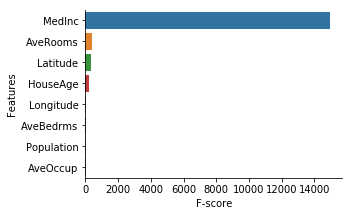

In [0]:
ax = sns.catplot(x=feature_ranking.columns[0], y=[index for index in feature_ranking.index], data=feature_ranking, kind="bar", legend=False)
ax.set(xlabel='F-score', ylabel='Features')
plt.show()

---> Ici, on voit que le classement des features est légèremetn différents. C'est sur ce f-score que l'on se fiera pour la suite des exercices. 

**Questions supplémentaires**

  
 

16. Prenez un échantillon de votre dataset via ```.sample()``` On prendra 150 valeurs

In [0]:
dataset = dataset.sample(150)
dataset.head()

17. Faites un reset des index pour avoir une suite de nombre comprise en 0 et la taille du dataset

In [0]:
dataset = dataset.reset_index(drop = True)
dataset.head()

  17. Utilisez l’aide suivante afin de traduire la longitude et la latitude des données pour trouver les villes correspondant à chaque observation : [geopy](https://pypi.org/project/geopy)

In [0]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="yet_another_app")
location = geolocator.reverse("52.509669, 13.376294")
loc_dict = dict(location.raw)
loc_dict["address"]["city"]

'Berlin'

In [0]:
from time import sleep
dataset["City"] = 0
for i in range(0, len(dataset)):
  geolocator = Nominatim(user_agent="yet_another_app_2")
  location = geolocator.reverse("{}, {}".format(dataset.loc[i, "Latitude"], dataset.loc[i, "Longitude"]), timeout = None)
  loc_dict = dict(location.raw)
  print(dict(location.raw)["address"])

  try:
    dataset.loc[i, "City"] = loc_dict["address"]["city"]
  except:
      try:
        dataset.loc[i, "City"] = loc_dict["address"]["town"]
      except:
        try:
           dataset.loc[i, "City"] = loc_dict["address"]["village"]
        except:
          pass
  

{'nature_reserve': 'Ecological Study Area', 'road': 'Upper Jordan Fire Trail', 'city': 'Oakland', 'county': 'Alameda County', 'state': 'California', 'postcode': '94720-1076', 'country': 'USA', 'country_code': 'us'}
{'nature_reserve': 'Grizzly Peak Open Space', 'road': 'Tunnel Road', 'city': 'Oakland', 'county': 'Alameda County', 'state': 'California', 'postcode': '94618', 'country': 'USA', 'country_code': 'us'}
{'road': 'Grove Shafter Freeway', 'neighbourhood': 'Upper Rockridge', 'city': 'Oakland', 'county': 'Alameda County', 'state': 'California', 'postcode': '94618', 'country': 'USA', 'country_code': 'us'}
{'house_number': '6369', 'road': 'Florio Street', 'neighbourhood': 'Rockridge', 'city': 'Oakland', 'county': 'Alameda County', 'state': 'California', 'postcode': '94618', 'country': 'USA', 'country_code': 'us'}
{'house_number': '6369', 'road': 'Florio Street', 'neighbourhood': 'Rockridge', 'city': 'Oakland', 'county': 'Alameda County', 'state': 'California', 'postcode': '94618', 'c

KeyboardInterrupt: ignored

 18. S'il y a des villes que vous n'avez pas trouvées, remplacez la valeur de la cellule par ```unknown```

In [0]:
dataset_sample = dataset

In [0]:
dataset_sample.City[dataset_sample.City == 0]= "Unknown"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


19. Trouvez le top 10 des villes qui ont les prix moyens les plus chers

In [0]:
dataset_sample.groupby("City").mean().sort_values(by="Price", ascending=False)[:10]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
City,,,,,,,,,
Canyon,11.601700,18.000000,8.335052,1.082474,533.000000,2.747423,37.840000,-122.190000,3.926000
Piedmont,4.928867,48.333333,5.961226,1.015960,970.666667,2.295046,37.823333,-122.240000,3.184000
Unknown,3.884588,28.382796,5.438650,1.097144,1433.027096,3.075782,35.595337,-119.524922,2.074660
Oakland,3.028306,43.801829,4.840136,1.070113,985.731707,2.774809,37.798201,-122.226402,1.701954
Berkeley,2.091143,46.857143,4.714187,1.034498,686.428571,2.502275,37.850000,-122.274286,1.317286
Emeryville,2.401600,52.000000,4.872016,1.048042,727.500000,2.599149,37.830000,-122.285000,0.898000
San Leandro,2.158700,43.000000,4.319648,1.087977,1231.000000,3.609971,37.730000,-122.170000,0.865000


[texte du lien](https://)20. Affichez ceci dans un graphique 

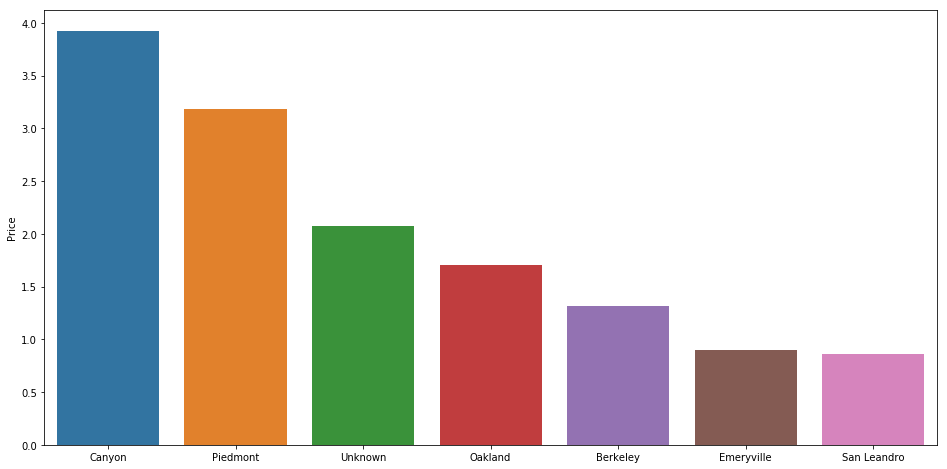

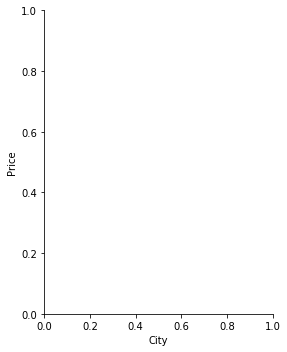

In [0]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.catplot(x=[city for city in dataset_sample.groupby("City").mean().sort_values(by="Price", ascending=False)[:10].index], 
            y="Price", 
            data=dataset_sample.groupby("City").mean().sort_values(by="Price", ascending=False)[:10], 
            kind='bar', 
            ax = ax
           )

ax.set(xlabel='City', ylabel='Price')
plt.show()

21. Refaites un modèle de régression linéaire en incluant les villes comme variables explicative. Quel score trouvez vous ?

In [0]:
# Dummyfication des villes 
dataset= pd.get_dummies(dataset, drop_first=True) 

In [0]:
# Séparation des variables 
X = dataset_sample.loc[:, dataset_sample.columns != "Price"]
y = dataset_sample.loc[:, dataset_sample.columns == "Price"]

In [0]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15)

In [0]:
# Normalisation des données
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [0]:
# Application du modèle 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [0]:
# Evaluation du modèle 
regressor.score(X_test, y_test)

22. Notre modèle est globalement moins bon. A votre avis pourquoi ? 

----> Nous avons beaucoup moins de données. Il faudrait qu'on prenne un sample plus grand pour que notre modèle aient de quoi s'entraîner correctement. 